# Test Visual Analysis of Data

Load data any try to analyse them meaningful

In [10]:
import pandas as pd
import pprint, time, os

wikidata = pd.read_csv(
    "data/wikidata_persons_botanists_20231030_1539.csv",
    index_col=0, low_memory=False
)

pprint.pprint(wikidata.columns)
display(wikidata.head())

Index(['item', 'itemLabel', 'surname', 'initials', 'canonical_string',
       'canonical_string_fullname', 'orcid', 'viaf', 'isni', 'harv', 'ipni',
       'abbr', 'bionomia_id', 'yob', 'yod', 'wyb', 'wye', 'wikidata_link',
       'orcid_link', 'harv_link', 'ipni_link', 'bionomia_link'],
      dtype='object')


,item,itemLabel,surname,initials,canonical_string,canonical_string_fullname,orcid,viaf,isni,harv,...,bionomia_id,yob,yod,wyb,wye,wikidata_link,orcid_link,harv_link,ipni_link,bionomia_link
0,http://www.wikidata.org/entity/Q66612,Friedrich August Marschall von Bieberstein,Bieberstein,F.A.M.v.,"Bieberstein, F.A.M.v.","Bieberstein, Friedrich August Marschall von",NaN,43340073,0000 0001 1630 5464,1373,...,Q66612,1768.0,1826.0,NaN,NaN,http://www.wikidata.org/wiki/Q66612,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/6129-1,https://bionomia.net/Q66612
1,http://www.wikidata.org/entity/Q66934,Hans Hermann Behr,Behr,H.H.,"Behr, H.H.","Behr, Hans Hermann",NaN,20328622,0000 0001 1604 8680,42741,...,Q66934,1818.0,1904.0,NaN,NaN,http://www.wikidata.org/wiki/Q66934,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/619-1,https://bionomia.net/Q66934
2,http://www.wikidata.org/entity/Q66661,Jacob Christian Schäffer,Schäffer,J.C.,"Schäffer, J.C.","Schäffer, Jacob Christian",NaN,47016953,0000 0000 8343 3899,1101,...,NaN,1718.0,1790.0,NaN,NaN,http://www.wikidata.org/wiki/Q66661,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/12818-1,NaN
3,http://www.wikidata.org/entity/Q67003,Johann Friedrich Klotzsch,Klotzsch,J.F.,"Klotzsch, J.F.","Klotzsch, Johann Friedrich",NaN,20426762,0000 0001 1749 2732,135,...,Q67003,1805.0,1860.0,NaN,NaN,http://www.wikidata.org/wiki/Q67003,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/4855-1,https://bionomia.net/Q67003
4,http://www.wikidata.org/entity/Q66322,Franz Anton Menge,Menge,F.A.,"Menge, F.A.","Menge, Franz Anton",NaN,59847236,0000 0001 1653 0899,73782,...,NaN,1808.0,1880.0,NaN,NaN,http://www.wikidata.org/wiki/Q66322,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/23266-1,NaN


In [11]:
import seaborn as sb # 

test_wdata_df=wikidata.loc[pd.notnull(wikidata['yob']) & pd.notnull(wikidata['yod'])].get(["yob", "yod"])
display(test_wdata_df)

,yob,yod
0,1768.0,1826.0
1,1818.0,1904.0
2,1718.0,1790.0
3,1805.0,1860.0
4,1808.0,1880.0
...,...,...
68528,1799.0,1832.0
68529,1815.0,1896.0
68530,1773.0,1845.0
68531,1847.0,1941.0


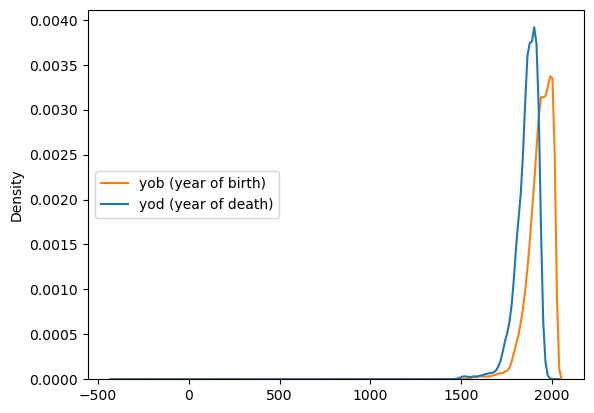

In [12]:
ax = sb.kdeplot(data=test_wdata_df)
# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
ax.legend(labels=['yob (year of birth)', 'yod (year of death)'])
sb.move_legend(ax, "center left")

In [13]:
# unique names parsed already by ruby gem package: dwcagent

match_results_collectors_cossim = pd.read_csv("data/results_bgbm_collectors_vs_wikidata-botanists_cossim-similarity_merged-data_20231030.csv", low_memory=False)

In [14]:
# unique names parsed already by ruby gem package: dwcagent

match_results_collectors_kneighbor = pd.read_csv(
    # "data/results_bgbm_collectors-eventDate_vs_wikidata-botanists_kneighbor_names-atomized_all-columns_20230823.csv"
    "data/results_bgbm_collectors_vs_wikidata-botanists_kneighbor_names-atomized_all-columns-compact_20230920.csv"
    , low_memory=False
)
# canonical_string_collector_parsed = namematch_source_data, df.assign(D=df.B)
if 'namematch_source_data' not in match_results_collectors_kneighbor.columns:
    print("copy column canonical_string_collector_parsed to namematch_source_data (namematch_source_data is missing but data are identical) ...")
    match_results_collectors_kneighbor=match_results_collectors_kneighbor.assign(namematch_source_data=match_results_collectors_kneighbor["canonical_string_collector_parsed"])
    # move namematch_source_data before namematch_resource_data
    col = match_results_collectors_kneighbor.pop("namematch_source_data")
    match_results_collectors_kneighbor.insert(match_results_collectors_kneighbor.columns.get_loc('namematch_resource_data'), col.name, col)
    print(match_results_collectors_kneighbor.columns)

copy column canonical_string_collector_parsed to namematch_source_data (namematch_source_data is missing but data are identical) ...
Index(['family', 'given', 'suffix', 'particle', 'dropping_particle',
       'canonical_string_collector_parsed', 'occurrenceID_collectors_count',
       'occurrenceID_collectors_firstsample', 'old_index',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_distance', 'item', 'itemLabel', 'surname', 'initials',
       'canonical_string', 'canonical_string_fullname', 'orcid', 'viaf',
       'isni', 'harv', 'ipni', 'abbr', 'bionomia_id', 'yob', 'yod', 'wyb',
       'wye', 'wikidata_link', 'orcid_link', 'harv_link', 'ipni_link',
       'bionomia_link'],
      dtype='object')


In [15]:
pprint.pprint(match_results_collectors_cossim.columns)
pprint.pprint(match_results_collectors_kneighbor.columns)


Index(['Unnamed: 0', 'canonical_string_collector_parsed', 'family', 'given',
       'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'source_data', 'namematch_source_data', 'namematch_resource_data',
       'namematch_similarity', 'item', 'canonical_string', 'itemLabel',
       'orcid', 'viaf', 'isni', 'harv', 'ipni', 'abbr', 'bionomia_id', 'yob',
       'yod', 'wyb'],
      dtype='object')
Index(['family', 'given', 'suffix', 'particle', 'dropping_particle',
       'canonical_string_collector_parsed', 'occurrenceID_collectors_count',
       'occurrenceID_collectors_firstsample', 'old_index',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_distance', 'item', 'itemLabel', 'surname', 'initials',
       'canonical_string', 'canonical_string_fullname', 'orcid', 'viaf',
       'isni', 'harv', 'ipni', 'abbr', 'bionomia_id', 'yob', 'yod', 'wyb',
       'wye', 'wikidata_link', 'orcid_link', 'harv_link', 'ipni_link',
       'bionomia_lin

In [16]:
print("Show example data of «Kotschy…» with Cosine Similiarity we had 0.6 … 1.0 (Nearest Neighbour distances were from 0.0 to almost 1.0)")
print("There was a match of Kotschyi, C.G.T. → Kotschy, T.   → 0.614 → http://www.wikidata.org/wiki/Q113299  with lower similarity and a correct match to Carl Georg Theodor … :-)")
print("There was a match of Kotschy, C.G.T.  → Kotschy, C.F. → 0.824 → http://www.wikidata.org/entity/Q86842 with higer similarity but it is probably a wrong match of Carl Georg Theodor → to Carl Friedrich … :-/")

Show example data of «Kotschy…» with Cosine Similiarity we had 0.6 … 1.0 (Nearest Neighbour distances were from 0.0 to almost 1.0)
There was a match of Kotschyi, C.G.T. → Kotschy, T.   → 0.614 → http://www.wikidata.org/wiki/Q113299  with lower similarity and a correct match to Carl Georg Theodor … :-)
There was a match of Kotschy, C.G.T.  → Kotschy, C.F. → 0.824 → http://www.wikidata.org/entity/Q86842 with higer similarity but it is probably a wrong match of Carl Georg Theodor → to Carl Friedrich … :-/


In [17]:
criterion = match_results_collectors_cossim['canonical_string_collector_parsed'].map(lambda x: x.startswith('Kotschy'))
testdata=match_results_collectors_cossim[criterion].get([
    # 'canonical_string_collector_parsed', # canonical_string_collector_parsed = namematch_source_data
    'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
    'namematch_source_data', 'namematch_resource_data', 'namematch_similarity', 
    # 'canonical_string_fullname', 
    'itemLabel', 'item'
])
pprint.pprint(testdata.columns)
display(testdata)

Index(['occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_similarity', 'itemLabel', 'item'],
      dtype='object')


,occurrenceID_collectors_count,occurrenceID_collectors_firstsample,namematch_source_data,namematch_resource_data,namematch_similarity,itemLabel,item
2582,294,http://id.snsb.info/snsb/collection/117808/176...,"Kotschy, T.","Kotschy, T.",1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
7719,1,http://id.snsb.info/snsb/collection/22980/3175...,"Kotschy, C.G.","Kotschy, C.F.",0.894,Carl Friedrich Kotschy,http://www.wikidata.org/entity/Q86842
7882,3,https://herbarium.bgbm.org/object/B100526350,"Kotschy, Th","Kotschy, T.",0.891,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
10690,2215,http://id.snsb.info/snsb/collection/108230/167...,"Kotschy, C.G.T.","Kotschy, C.F.",0.823,Carl Friedrich Kotschy,http://www.wikidata.org/entity/Q86842
12624,1,https://herbarium.bgbm.org/object/B101086119,"Kotschy, Carl Georg Theodor","Kotschy, Theodor",0.746,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
13133,36,http://id.snsb.info/snsb/collection/16719/2549...,"Kotschy, K.G.T.","Kotschy, T.",0.721,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
15067,1,https://herbarium.bgbm.org/object/B100160086,"Kotschyi, C.G.T.","Kotschy, T.",0.614,Theodor Kotschy,http://www.wikidata.org/entity/Q113299


In [18]:
plotdata=testdata.sort_values("namematch_similarity", ascending=False)
display(plotdata)

# list(plotdata['namematch_resource_data'])[1]

,occurrenceID_collectors_count,occurrenceID_collectors_firstsample,namematch_source_data,namematch_resource_data,namematch_similarity,itemLabel,item
2582,294,http://id.snsb.info/snsb/collection/117808/176...,"Kotschy, T.","Kotschy, T.",1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
7719,1,http://id.snsb.info/snsb/collection/22980/3175...,"Kotschy, C.G.","Kotschy, C.F.",0.894,Carl Friedrich Kotschy,http://www.wikidata.org/entity/Q86842
7882,3,https://herbarium.bgbm.org/object/B100526350,"Kotschy, Th","Kotschy, T.",0.891,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
10690,2215,http://id.snsb.info/snsb/collection/108230/167...,"Kotschy, C.G.T.","Kotschy, C.F.",0.823,Carl Friedrich Kotschy,http://www.wikidata.org/entity/Q86842
12624,1,https://herbarium.bgbm.org/object/B101086119,"Kotschy, Carl Georg Theodor","Kotschy, Theodor",0.746,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
13133,36,http://id.snsb.info/snsb/collection/16719/2549...,"Kotschy, K.G.T.","Kotschy, T.",0.721,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
15067,1,https://herbarium.bgbm.org/object/B100160086,"Kotschyi, C.G.T.","Kotschy, T.",0.614,Theodor Kotschy,http://www.wikidata.org/entity/Q113299


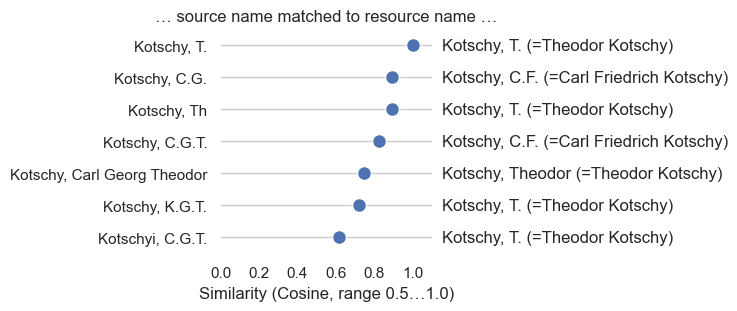

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")

max_similarity = plotdata['namematch_similarity'].max()
min_similarity = plotdata['namematch_similarity'].min()

# Make the PairGrid
g = sns.PairGrid(
    plotdata,
    x_vars=['namematch_similarity'], 
    y_vars=["namematch_source_data"],
    height=3, aspect=1
)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, max_similarity * 1.1), xlabel="Similarity (Cosine, range 0.5…1.0)", ylabel=""   )

# Use semantically meaningful titles for the columns
titles = ["… source name matched to resource name …"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(
        title=title, 
        xticks=[x / 40 for x in range(0, round(max_similarity * 1.15 * 40), 8)]
        # print([x / 40 for x in range(0, round(max_similarity * 1.20 * 40), 8)]) # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    )
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
    # ax.tick_params(labelright=True)  # idea would be to reset ymajorticklabels on the secondary axis right or add manually text(x, y , customstring)
    # see also https://github.com/BindiChen/machine-learning/blob/main/data-visualization/0010-multiple-y-axis/multiple-y-axis-combo-chart.ipynb
    for this_y in ax.get_yticks():
        # print(ax.get_yticks()) # [0, 1, 2, 3, 4, 5, 6, 7, 8]
        
        # see https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
        test=ax.text(
            x=max_similarity * 1.15, 
            y=this_y, 
            s="%s (=%s)" % (
                list(plotdata['namematch_resource_data'])[this_y]
                ,
                list(plotdata['itemLabel']              )[this_y]
            ),
            verticalalignment='center', fontstyle='normal', fontsize='medium'
        )

sns.despine(left=True, bottom=True) # remove box lines

In [20]:
criterion = match_results_collectors_kneighbor['canonical_string_collector_parsed'].map(lambda x: x.startswith('Kotsch'))
testdata=match_results_collectors_kneighbor[criterion].get([
    # 'canonical_string_collector_parsed', # canonical_string_collector_parsed = namematch_source_data
    'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
    'namematch_source_data', 'namematch_resource_data', 'namematch_distance', 
    # 'canonical_string_fullname', 
    'itemLabel', 'item'
])
pprint.pprint(testdata.columns)

Index(['occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_distance', 'itemLabel', 'item'],
      dtype='object')


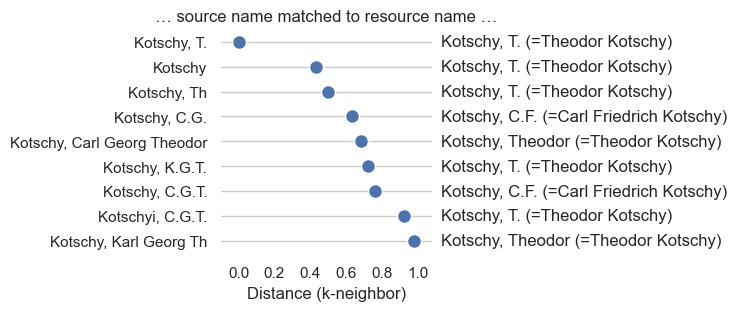

In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plotdata=testdata.sort_values("namematch_distance", ascending=True)
max_similarity = plotdata['namematch_distance'].max()
min_similarity = plotdata['namematch_distance'].min()

# Make the PairGrid
g = sns.PairGrid(
    plotdata,
    x_vars=['namematch_distance'], 
    y_vars=["namematch_source_data"],
    height=3, aspect=1
)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(- 0.1, max_similarity * 1.1), xlabel="Distance (k-neighbor)", ylabel=""     )

# Use semantically meaningful titles for the columns
titles = ["… source name matched to resource name …"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(
        title=title, 
        xticks=[x / 40 for x in range(0, round(max_similarity * 1.15 * 40), 8)]
        # print([x / 40 for x in range(0, round(max_similarity * 1.20 * 40), 8)]) # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    )
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
    # ax.tick_params(labelright=True)  # idea would be to reset ymajorticklabels on the secondary axis right or add manually text(x, y , customstring)
    # see also https://github.com/BindiChen/machine-learning/blob/main/data-visualization/0010-multiple-y-axis/multiple-y-axis-combo-chart.ipynb
    for this_y in ax.get_yticks():
        # print(ax.get_yticks()) # [0, 1, 2, 3, 4, 5, 6, 7, 8]
        test=ax.text(
            x=max_similarity * 1.15, 
            y=this_y, 
            s="%s (=%s)" % (
                list(plotdata['namematch_resource_data'])[this_y],
                list(plotdata['itemLabel']              )[this_y]
            ),
            verticalalignment='center', fontstyle='normal', fontsize='medium'
        )

sns.despine(left=True, bottom=True) # remove box lines

In [22]:
# TODO review code of abbreviated names and full name matching
criterion_fullnames = match_results_collectors_kneighbor.given.str.contains('^\w{3,}', na=False)
print("Show collecors given name has (propably) a full name (%s records) …" % len(match_results_collectors_kneighbor[criterion_fullnames].index))
match_results_collectors_kneighbor[criterion_fullnames]

Show collecors given name has (propably) a full name (538 records) …


,family,given,suffix,particle,dropping_particle,canonical_string_collector_parsed,occurrenceID_collectors_count,occurrenceID_collectors_firstsample,old_index,namematch_source_data,...,bionomia_id,yob,yod,wyb,wye,wikidata_link,orcid_link,harv_link,ipni_link,bionomia_link
75,Alschinger,Andreas,NaN,NaN,NaN,"Alschinger, Andreas",1,https://herbarium.bgbm.org/object/B100749292,65,"Alschinger, Andreas",...,NaN,1791.0,1864.0,NaN,NaN,http://www.wikidata.org/wiki/Q5675238,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/168-1,NaN
189,Auerswald,Bernhard,NaN,NaN,NaN,"Auerswald, Bernhard",2,https://dr.jacq.org/DR022081,278,"Auerswald, Bernhard",...,Q5727033,1818.0,1870.0,NaN,NaN,http://www.wikidata.org/wiki/Q5727033,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/31082-1,https://bionomia.net/Q5727033
291,Bauer,Ferdinand,NaN,NaN,NaN,"Bauer, Ferdinand",1,https://herbarium.bgbm.org/object/B200125230,282,"Bauer, Ferdinand",...,Q79012,1760.0,1826.0,NaN,NaN,http://www.wikidata.org/wiki/Q79012,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/551-1,https://bionomia.net/Q79012
330,Becker,Alexander K.,NaN,NaN,NaN,"Becker, Alexander K.",3,https://je.jacq.org/JE00007394,466,"Becker, Alexander K.",...,Q4719276,1818.0,1901.0,NaN,NaN,http://www.wikidata.org/wiki/Q4719276,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/598-1,https://bionomia.net/Q4719276
338,Beckmann,Carl Ludwig,NaN,NaN,NaN,"Beckmann, Carl Ludwig",2,https://herbarium.bgbm.org/object/B100757493,342,"Beckmann, Carl Ludwig",...,Q21505861,1845.0,1898.0,NaN,NaN,http://www.wikidata.org/wiki/Q21505861,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/15865-1,https://bionomia.net/Q21505861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22336,Entry,Provisional,NaN,NaN,NaN,"Entry, Provisional",152,https://herbarium.bgbm.org/object/B100169867,114,"Entry, Provisional",...,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q82758799,NaN,NaN,https://www.ipni.org/a/20040762-1,NaN
22340,Kirinco,Synho,NaN,NaN,NaN,"Kirinco, Synho",1,https://herbarium.bgbm.org/object/BW05462010,290,"Kirinco, Synho",...,NaN,1951.0,2018.0,NaN,NaN,http://www.wikidata.org/wiki/Q56742818,NaN,https://kiki.huh.harvard.edu/databases/botanis...,NaN,NaN
22347,Rainbird,Coldecott,NaN,NaN,NaN,"Rainbird, Coldecott",1,https://herbarium.bgbm.org/object/B100591942,222,"Rainbird, Coldecott",...,Q2504068,1724.0,1766.0,NaN,NaN,http://www.wikidata.org/wiki/Q2504068,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/1730-1,https://bionomia.net/Q2504068
22349,Xinjiang,Inst Bio-Ped-Psamm,NaN,NaN,NaN,"Xinjiang, Inst Bio-Ped-Psamm",2,http://id.snsb.info/snsb/collection/469589/575...,69,"Xinjiang, Inst Bio-Ped-Psamm",...,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q36592097,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/29635-1,NaN


## Documentation

TODO document columns

Explanation of columns:

Column | Description
-|-
**Botanical collectors** |
family | parsed family name
given | parsed given name
suffix | suffix from name parsing
particle | particle from name parsing
dropping_particle | dropping_particle from name parsing
nick | nick name from name parsing
appellation | appellation from name parsing
title | title from name parsing
occurrenceID_collectors_count | count of all occurrenceID of one particular collector name
occurrenceID_collectors_firstsample | a data sample of an occurrenceID 
eventDate | date of the sampling event (required by GBIF, see https://www.gbif.org/data-quality-requirements-sampling-events)
eventDate_min | calculated earliest date of all the sampling events within the data
eventDate_max | calculated latest date of all the sampling events within the data
eventDate_mean | calculated mean date of all the sampling events within the data
TODO activity_span | Number of years between first and last collection
**Name matching** |
namematch_source_data | matched name of the collector data set
namematch_resource_data | matched name of Wikidata the collector was tried to matched to
namematch_similarity | calculated cosine-similarity
**Wikidata** |
item | Wikidata Item ID (URL)
itemLabel | Wikidata Item label (perhaps similar to the full name)
surname	| Surname; derived from item label
initials | Initials; derived from item label
canonical_string | Canonical name string; derived from item label, used for matching
orcid | ORCID ([P496](https://www.wikidata.org/wiki/Property:P496))
viaf | VIAF ID ([P214](https://www.wikidata.org/wiki/Property:P214))
isni | ISNI ID ([P213](https://www.wikidata.org/wiki/Property:P496))	
harv | Harvard Index of Botanists ID ([P6264](https://www.wikidata.org/wiki/Property:P6264))
ipni | IPNI author ID ([P586](https://www.wikidata.org/wiki/Property:P586))
abbr | botanist author abbreviation (standard form) ([P428](https://www.wikidata.org/wiki/Property:P428))
bionomia_id | identifier for a collector and/or determiner of natural history specimens, in the Bionomia database ([P6944](https://www.wikidata.org/wiki/Property:P6944))
yob	| Year of birth (derived from [P569](https://www.wikidata.org/wiki/Property:P569))
yod	| Year of death (derived from [P496](https://www.wikidata.org/wiki/Property:P570))
wyb	| Work year period begin ([P2031](https://www.wikidata.org/wiki/Property:P2031))
wye | Work year period end ([P2032](https://www.wikidata.org/wiki/Property:P2032))